<a href="https://colab.research.google.com/github/aksha1234/selenium-youtube-scrapper/blob/main/Rakuten_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve 
%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

## Importing the Dataset

In [7]:
train_df=pd.read_csv('/content/train.csv')
test_df=pd.read_csv('/content/test.csv')
master=pd.read_csv('/content/master.csv')


In [19]:
for df in [train_df,test_df,master]:
  print(df.shape)

(154248, 16)
(155902, 15)
(2500, 3)


## Checking the top 10 highest post authors 

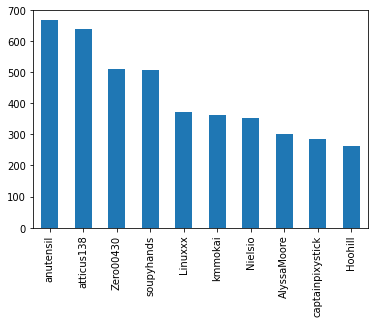

In [22]:
train_df.head()
train_df.author.value_counts()[:10].plot(kind='bar')

In [25]:
master.columns=['url','subscribers', 'name']

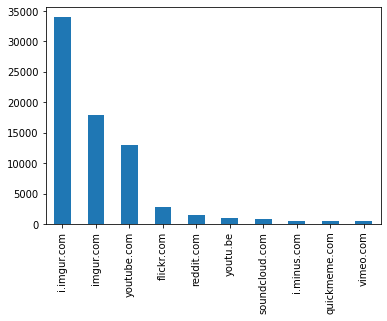

In [30]:
## Let us know the domain plot
train_df.domain.value_counts()[:10].plot(kind='bar')

#### It means most of the post were from *imgur*.

In [31]:
train_df.head()

,score,domain,id,title,author,ups,downs,num_comments,permalink,over_18,subreddit_id,edited,is_self,name,url,created_date
0,324,youtube.com,10vto2,"Notch posted a demonstration of the game - """"""...",MartinPedro,NaN,28.0,209.0,http://www.reddit.com/r/0x10c/comments/10vto2/...,False,t5_2tu92,False,False,t3_10vto2,http://www.youtube.com/watch?v=49mUfXxDG48,2012-10-03 17:07:57
1,298,youtube.com,11d8ih,New art test and dynamic lights for 0x10c,MartinPedro,317.0,19.0,NaN,http://www.reddit.com/r/0x10c/comments/11d8ih/...,False,t5_2tu92,False,False,t3_11d8ih,http://www.youtube.com/watch?v=nYojT0Xgt9Y,2012-10-12 14:53:27
2,295,i.imgur.com,usp9b,Not being a programmer in 0x10c,Urgin,333.0,38.0,34.0,http://www.reddit.com/r/0x10c/comments/usp9b/n...,False,t5_2tu92,False,False,t3_usp9b,http://i.imgur.com/SCaPS.gif,2012-06-09 03:47:18
3,286,0x10c.com,13uapp,At Minecon one of the Mojang guys told me that...,BubblegumBalloon,313.0,27.0,329.0,http://www.reddit.com/r/0x10c/comments/13uapp/...,False,t5_2tu92,False,False,t3_13uapp,http://0x10c.com/wp-content/uploads/2012/10/DC...,2012-11-26 23:53:28
4,264,i.imgur.com,122hjs,0x10c's artist posted a mockup for what the ga...,deadstone,284.0,NaN,139.0,http://www.reddit.com/r/0x10c/comments/122hjs/...,False,t5_2tu92,False,False,t3_122hjs,http://i.imgur.com/akByX.jpg,2012-10-25 15:21:17


In [33]:
train_df.columns

Index(['score', 'domain', 'id', 'title', 'author', 'ups', 'downs',
       'num_comments', 'permalink', 'over_18', 'subreddit_id', 'edited',
       'is_self', 'name', 'url', 'created_date'],
      dtype='object')

In [34]:
imp_cols=['score','title','author','author','ups','downs','num_comments','over_18','is_self','created_date']

In [35]:
train_df=train_df[imp_cols]

## Finding out the missing values in the data.

In [37]:
train_df.isnull().sum()

score               0
title               0
author          12958
author          12958
ups             23363
downs           15426
num_comments     7732
over_18             0
is_self             0
created_date        1
dtype: int64

In [39]:
## Let us delete the missing rows as number of votes ups and down matters a lot.
train_df.dropna(axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
## Lets check whether any missing values are not there
train_df.isnull().sum()

score           0
title           0
author          0
author          0
ups             0
downs           0
num_comments    0
over_18         0
is_self         0
created_date    0
dtype: int64

In [40]:
target_col=['score']

In [44]:
pd.to_datetime(train_df.created_date).dt.year

2         2012
3         2012
5         2012
6         2012
7         2012
          ... 
154242    2010
154243    2010
154244    2012
154245    2012
154246    2012
Name: created_date, Length: 102503, dtype: int64

In [45]:
## Let us segregate the post wise month and year and week day
train_df['year']=pd.to_datetime(train_df.created_date).dt.year
train_df['month']=pd.to_datetime(train_df.created_date).dt.month
train_df['weekday']=pd.to_datetime(train_df.created_date).dt.weekday


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [47]:
train_df.head()

,score,title,author,author,ups,downs,num_comments,over_18,is_self,created_date,year,month,weekday
2,295,Not being a programmer in 0x10c,Urgin,Urgin,333.0,38.0,34.0,False,False,2012-06-09 03:47:18,2012,6,5
3,286,At Minecon one of the Mojang guys told me that...,BubblegumBalloon,BubblegumBalloon,313.0,27.0,329.0,False,False,2012-11-26 23:53:28,2012,11,0
5,238,This alone would make for a game that I would ...,nomlah,nomlah,255.0,17.0,46.0,False,False,2012-09-20 02:09:09,2012,9,3
6,236,Notch makes a multiplayer test of 0x10c!,TheNikodilay,TheNikodilay,259.0,23.0,82.0,False,False,2012-10-22 14:36:57,2012,10,0
7,216,Screenshot of the new ship builder that Notch ...,RobertJFClarke,RobertJFClarke,230.0,14.0,34.0,False,False,2012-11-21 09:52:26,2012,11,2


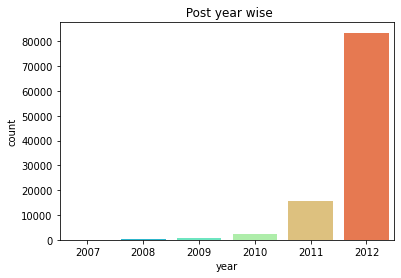

In [52]:
train_df.year.unique()
sns.countplot(data=train_df,x='year',palette='rainbow')
plt.title(' Post year wise');

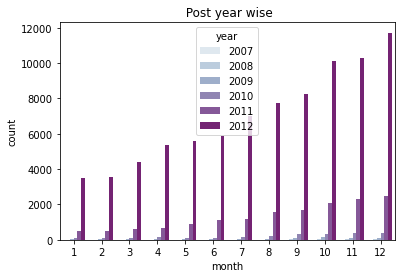

In [54]:
# Similarly let see the data wise month
train_df.year.unique()
sns.countplot(data=train_df,x='month',hue='year',palette='BuPu')
plt.title(' Post year wise');

**As it can be seen most of the posts are from 2012 may be teh data is not taken in the earlier years.**

In [103]:
train_df.columns.tolist()

['score',
 'title',
 'author',
 'author',
 'ups',
 'downs',
 'num_comments',
 'over_18',
 'is_self',
 'created_date',
 'year',
 'month',
 'weekday']

In [104]:
input_cols=['ups','downs','num_comments','over_18','is_self','year','month']

In [118]:
train_df1=train_df[input_cols].copy()
train_target=train_df[target_col].copy()

In [119]:
train_df1

,ups,downs,num_comments,over_18,is_self,year,month
2,333.0,38.0,34.0,False,False,2012,6
3,313.0,27.0,329.0,False,False,2012,11
5,255.0,17.0,46.0,False,False,2012,9
6,259.0,23.0,82.0,False,False,2012,10
7,230.0,14.0,34.0,False,False,2012,11
...,...,...,...,...,...,...,...
154242,9.0,0.0,4.0,False,False,2010,4
154243,7.0,0.0,0.0,False,False,2010,4
154244,7.0,1.0,0.0,False,True,2012,12
154245,9.0,3.0,2.0,False,True,2012,11


In [120]:
code={True:1,False:0}

In [121]:
train_df1['over_18']=train_df1['over_18'].map(code)
train_df1['is_self']=train_df1['is_self'].map(code)

In [122]:
train_df1

,ups,downs,num_comments,over_18,is_self,year,month
2,333.0,38.0,34.0,0,0,2012,6
3,313.0,27.0,329.0,0,0,2012,11
5,255.0,17.0,46.0,0,0,2012,9
6,259.0,23.0,82.0,0,0,2012,10
7,230.0,14.0,34.0,0,0,2012,11
...,...,...,...,...,...,...,...
154242,9.0,0.0,4.0,0,0,2010,4
154243,7.0,0.0,0.0,0,0,2010,4
154244,7.0,1.0,0.0,0,1,2012,12
154245,9.0,3.0,2.0,0,1,2012,11


In [123]:
numerical_cols=train_df1.select_dtypes(include=np.number).columns.tolist()

In [124]:
numerical_cols

['ups', 'downs', 'num_comments', 'over_18', 'is_self', 'year', 'month']

In [125]:
## So after mapping the dataset we found that we dont have any categorical columns

In [126]:
## As teh data can be seen in the disproportionate form
from sklearn.preprocessing import MinMaxScaler

In [127]:
scaler=MinMaxScaler().fit(train_df1[numerical_cols])

In [128]:
train_df1[numerical_cols]=scaler.transform(train_df1[numerical_cols])

In [129]:
## Splittingg the data 
from sklearn.model_selection import train_test_split

In [130]:
train_inputs,val_inputs,train_targets,val_targets=train_test_split(train_df1,train_target,random_state=0,test_size=0.1)

In [132]:
from sklearn.ensemble import RandomForestRegressor

In [133]:
model=RandomForestRegressor(n_jobs=-1,random_state=0).fit(train_inputs,train_targets)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [135]:
prediction_test=model.predict(train_inputs)
prediction_val=model.predict(val_inputs)

In [138]:
## training score
print(model.score(train_inputs,train_targets),
## validation score
model.score(val_inputs,val_targets))

0.9974336262598393 0.9831853547172011


## Using teh Grid search Cv to find teh best hyper parameter

In [139]:
## Let us use the gridsearch cv for hyper parametr tninng 
from sklearn.model_selection import GridSearchCV

In [140]:
parameter={'n_estimators':[5,10,15,50,100],'max_depth':[2,5,8,10]}

In [141]:
grid_search=GridSearchCV(model,parameter,cv=10)

In [145]:
print(train_targets.shape,train_inputs.shape)

(92252, 1) (92252, 7)


In [146]:
test_df

,domain,id,title,author,ups,downs,num_comments,permalink,over_18,subreddit_id,edited,is_self,name,url,created_date
0,i.imgur.com,16zj9b,Notch in 0x10c,BubblegumBalloon,289.0,28.0,40.0,http://www.reddit.com/r/0x10c/comments/16zj9b/...,False,t5_2tu92,False,False,t3_16zj9b,http://i.imgur.com/7gp4m2a.png,2013-01-21 13:15:32
1,i.imgur.com,16bb5r,eldrone tweets some astronaut's faces for 0x10c,r4d2,NaN,23.0,43.0,http://www.reddit.com/r/0x10c/comments/16bb5r/...,False,t5_2tu92,False,False,t3_16bb5r,http://i.imgur.com/3zOGU.png,2013-01-10 14:12:43
2,i.imgur.com,16bcyc,eldrone posted this about face editor,fancreeper2,197.0,10.0,26.0,http://www.reddit.com/r/0x10c/comments/16bcyc/...,False,t5_2tu92,False,False,t3_16bcyc,http://i.imgur.com/jdK8z.png,2013-01-10 14:50:07
3,i.imgur.com,16zq52,"Sup, ladies.",tomutwit,184.0,NaN,6.0,http://www.reddit.com/r/0x10c/comments/16zq52/...,False,t5_2tu92,False,False,t3_16zq52,http://i.imgur.com/fQ6p1Fz.gif,2013-01-21 15:43:43
4,twitter.com,16449c,Notch tweets of regained 0x10c inspiration,edwardsch,NaN,14.0,45.0,http://www.reddit.com/r/0x10c/comments/16449c/...,False,t5_2tu92,False,False,t3_16449c,http://twitter.com/notch/statuses/288218096756...,2013-01-07 10:23:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155897,i.imgur.com,1d8pha,Hang Out,robvargas,NaN,NaN,5.0,http://www.reddit.com/r/EmmaWatson/comments/1d...,False,t5_2rd1x,False,False,t3_1d8pha,http://i.imgur.com/nrXaf2x.jpg,2013-04-27 23:03:46
155898,i.imgur.com,194zgs,Emma for Elle France - 2012 (AIC),NaN,360.0,61.0,6.0,http://www.reddit.com/r/EmmaWatson/comments/19...,False,t5_2rd1x,False,False,t3_194zgs,http://i.imgur.com/OpZ0Dfk.jpg,2013-02-24 17:03:43
155899,i.imgur.com,18fpey,Studying,gmw2222,338.0,44.0,7.0,http://www.reddit.com/r/EmmaWatson/comments/18...,False,t5_2rd1x,False,False,t3_18fpey,http://i.imgur.com/CXqAWrq.jpg?1,2013-02-13 08:33:58
155900,i.imgur.com,1hzxhy,Late Show-stopper,Chop_Artista,341.0,48.0,NaN,http://www.reddit.com/r/EmmaWatson/comments/1h...,False,t5_2rd1x,False,False,t3_1hzxhy,http://i.imgur.com/LuxfnCc.jpg,2013-07-10 09:19:59


In [148]:
test_df.columns

Index(['domain', 'id', 'title', 'author', 'ups', 'downs', 'num_comments',
       'permalink', 'over_18', 'subreddit_id', 'edited', 'is_self', 'name',
       'url', 'created_date'],
      dtype='object')

In [149]:
train_inputs

,ups,downs,num_comments,over_18,is_self,year,month
141834,0.000192,0.000094,0.000008,0.0,0.0,0.8,0.181818
27282,0.000577,0.000174,0.000059,0.0,1.0,1.0,0.636364
116656,0.000472,0.000067,0.000078,0.0,0.0,1.0,0.818182
63942,0.001198,0.000575,0.000184,0.0,0.0,1.0,1.000000
120124,0.000297,0.000054,0.000017,0.0,0.0,1.0,0.181818
...,...,...,...,...,...,...,...
32001,0.000070,0.000054,0.000006,0.0,0.0,1.0,0.818182
69005,0.000534,0.000201,0.000006,0.0,0.0,1.0,0.727273
64240,0.000061,0.000067,0.000017,0.0,0.0,1.0,0.363636
65660,0.003569,0.001057,0.000162,0.0,0.0,1.0,0.909091


In [157]:
test_df=pd.read_csv('/content/test.csv')

,domain,id,title,author,ups,downs,num_comments,permalink,over_18,subreddit_id,edited,is_self,name,url,created_date
530809,i.imgur.com,1d1sdb,Blue sweater,jared091787,1.0,1.0,0.0,http://www.reddit.com/r/zooeydeschanel/comment...,False,t5_2rlrw,False,False,t3_1d1sdb,http://i.imgur.com/XhQmGI9.jpg,2013-04-25 00:40:28
530810,static.lfgss.com,1c04lc,Zooey posing by a bike (did she match her shoe...,franch,1.0,2.0,0.0,http://www.reddit.com/r/zooeydeschanel/comment...,False,t5_2rlrw,False,False,t3_1c04lc,http://static.lfgss.com/attachments/12584d1248...,2013-04-09 17:59:00
530811,twitter.com,1ekwwt,"Twitter / peterogburn: .@ZooeyDeschanel So, yo...",antdude,2.0,4.0,1.0,http://www.reddit.com/r/zooeydeschanel/comment...,False,t5_2rlrw,False,False,t3_1ekwwt,https://twitter.com/peterogburn/status/3254179...,2013-05-18 15:52:50
530812,imgur.com,166f62,Is this real ?,paranoidray,4.0,6.0,1.0,http://www.reddit.com/r/zooeydeschanel/comment...,False,t5_2rlrw,False,False,t3_166f62,http://imgur.com/NGpfE,2013-01-08 11:00:19
530813,i.imgur.com,18k4ma,Zooey Deschanel Valentine's Day Card,Evil_Steven,6.0,8.0,NaN,http://www.reddit.com/r/zooeydeschanel/comment...,False,t5_2rlrw,False,False,t3_18k4ma,http://i.imgur.com/SEEmbso.jpg,2013-02-15 02:55:43


In [ ]:
test_df.fillna()

In [183]:
def test_data(df):
  df1=df.copy()
  df1['year']=pd.to_datetime(df1.created_date).dt.year
  df1['month']=pd.to_datetime(df1.created_date).dt.month
  df1.fillna(method='bfill',inplace=True)
  df1=df1[input_cols]
  df1['over_18']=df1['over_18'].map(code)
  df1['is_self']=df1['is_self'].map(code)
  df1[numerical_cols]=scaler.transform(df1[numerical_cols])
  predict_test = model.predict(df1.fillna(0))
  return predict_test


In [184]:
submission_df=pd.DataFrame({'id':test_df.id,'score':test_data(test_df)})

In [185]:
submission_df

,id,score
0,16zj9b,261.37
1,16bb5r,173.74
2,16bcyc,186.28
3,16zq52,170.14
4,16449c,134.23
...,...,...
530809,1d1sdb,0.00
530810,1c04lc,0.00
530811,1ekwwt,0.00
530812,166f62,0.00


In [186]:
submission_df.to_csv('submission.csv',index=False)